In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

In [13]:
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [14]:
df.isna().sum(axis = 0)/len(df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [15]:
df = df.drop(['Cabin'], axis = 1)

In [16]:
df = df[ df.Age.notna() ]

In [17]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [18]:
vars_disc = ['Survived', 'Pclass', 'Sex', 'SibSp','Parch','Embarked']
for i in vars_disc:
  df[i].value_counts()

In [19]:
vars_cat = ['Pclass', 'Sex','Embarked']

def one_hot():

# One hot encoding

  for i in vars_cat:
    categorias = df[i].value_counts().index
    print(categorias)

  for k in categorias:
    name = 'is-'+ str(i)+'-'+str(k)
    print(name)
    df[name] = np.where(df[i] == k, 1,0)

  df = df.drop([i], axis = 1)

In [20]:
# Outliers 
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [21]:
df['family_size'] = df['SibSp'] + df['Parch'] 

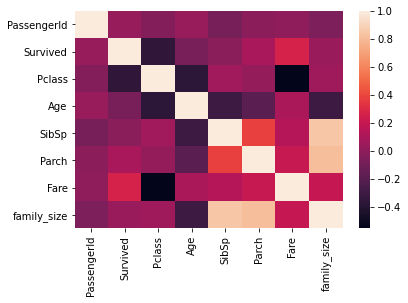

In [22]:
corr = df.corr()
sns.heatmap(corr, yticklabels=corr.columns, xticklabels=corr.columns)